# Kaggle: Analysis on ML and Data Science survey of 2019 and India Presence

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


# import Kaggle 2019 data

In [ ]:
#impot the Kaggle's data
df=pd.read_csv("multiple_choice_responses")

In [414]:
#Delete the question row and keep the question column
df.drop(df.index[0], inplace=True)

In [415]:

# Get column names.
df_columns = df.columns.tolist()
# Get the shape
df_shape=df.shape

## Evaluate Missing Data

In [416]:
#Missing Stats

df_Missing= (df.isna().sum()/df_shape[0]).sort_values()

# Get names of columns which do not have missing value
df_columns_noblanks = df_Missing[df_Missing == 0].index.tolist()

# Get names of columns which are missing
df_columns_blanks = df_Missing[df_Missing != 0].index.tolist()

In [467]:
#Overview of the Data
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
8,624,22-24,Female,-1,United States of America,Bachelor’s degree,Data Scientist,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
16,485,50-54,Female,-1,United States of America,Master’s degree,Data Analyst,-1,50-249 employees,1-2,...,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
34,402,30-34,Female,-1,United States of America,Master’s degree,Research Scientist,-1,"> 10,000 employees",20+,...,Microsoft SQL Server,NaN,Microsoft Access,AWS Relational Database Service,NaN,Azure SQL Database,Google Cloud SQL,NaN,NaN,-1
40,1341,30-34,Female,-1,United States of America,Doctoral degree,Product/Project Manager,-1,"1000-9,999 employees",20+,...,Microsoft SQL Server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
57,578,45-49,Female,-1,India,Doctoral degree,Data Analyst,-1,50-249 employees,1-2,...,Microsoft SQL Server,NaN,Microsoft Access,NaN,NaN,NaN,NaN,NaN,NaN,-1


# Kagglers Who are they?

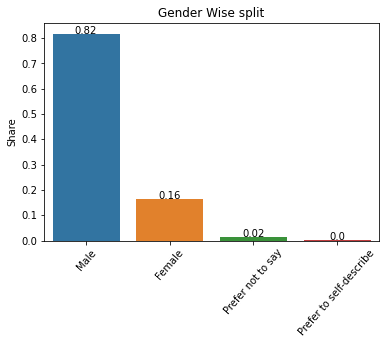

                    Gender     Share
0                     Male  0.818482
1                   Female  0.162905
2        Prefer not to say  0.016128
3  Prefer to self-describe  0.002485


In [418]:
# Analysis of gender.

Gen_barplot = df["Q2"].value_counts()/df_shape[0]
Gen_barplot = pd.DataFrame({'Gender':Gen_barplot.index,
                                    'Share':Gen_barplot.values})

fig = sns.barplot(y = "Share", x = "Gender", data=Gen_barplot)
for index, row in Gen_barplot.iterrows():
    fig.text(row.name,row.Share, round(row.Share,2), color='black', ha="center")
       
fig.set_xlabel('')
fig.set_title('Gender Wise split')
plt.xticks(rotation=49);

fig = fig.get_figure() 
plt.show()
print (Gen_barplot)


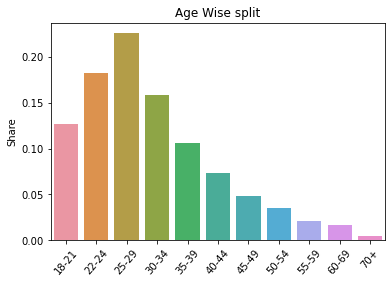

      Age     Share
0   25-29  0.226099
1   22-24  0.183091
2   30-34  0.158239
3   18-21  0.126896
4   35-39  0.105848
5   40-44  0.072983
6   45-49  0.048131
7   50-54  0.035097
8   55-59  0.021403
9   60-69  0.017143
10    70+  0.005072


In [423]:
# Analysis of Age.

Age_barplot = df["Q1"].value_counts()/df_shape[0]
Age_barplot = pd.DataFrame({'Age':Age_barplot.index,
                                    'Share':Age_barplot.values})
Age_barplot_srt=Age_barplot.sort_values(by='Age', ascending=True)

fig = sns.barplot(y = "Share", x = "Age", data=Age_barplot_srt)
   
fig.set_xlabel('')
fig.set_title('Age Wise split')
plt.xticks(rotation=49);

fig = fig.get_figure() 
plt.show()
print (Age_barplot)




The majority of our respondents are in between the age group of  22 and 34 years old, with the peak group in the 25-29 age bracket.

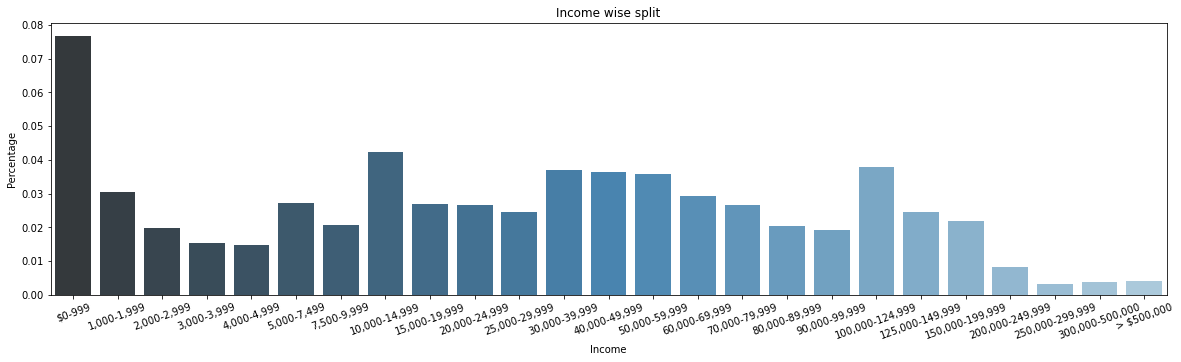

In [449]:
df_income_barplot= df["Q10"].value_counts()/df_shape[0]
df_income_barplot = pd.DataFrame({'Income':df_income_barplot.index,
                                 'Share':df_income_barplot.values}).sort_values(['Income'])

df_label_income = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
        '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999','30,000-39,999',
        '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999',
        '90,000-99,999', '100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
        '250,000-299,999', '300,000-500,000', '> $500,000'] 

df_income_barplot["Income"] = pd.Categorical(df_income_barplot["Income"], categories=df_label_income, ordered=True)

df_income_barplot

plt.figure(figsize=(20,5))
fig = sns.barplot(y = "Share", x = "Income", data=df_income_barplot, palette="Blues_d")
fig.set_xlabel('')
fig.set_title('Income wise split')
plt.xlabel("Income")
plt.ylabel("Percentage")
plt.xticks(rotation=20);
fig = fig.get_figure() 
fig.savefig("income.png", bbox_inches='tight')

# Is there any presence of India?

In [421]:
#Filter the data based on India
df_india = df.loc[(df.Q3=="India"),:]

In [422]:
#get the shape
df_india_shape=df_india.shape
#Overview of the India Data
df_india.head()


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
5,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
7,529,22-24,Male,-1,India,Master’s degree,Data Scientist,-1,50-249 employees,20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
11,290,18-21,Male,-1,India,Some college/university study without earning ...,Student,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
15,524,25-29,Male,-1,India,Bachelor’s degree,Other,3,"1000-9,999 employees",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


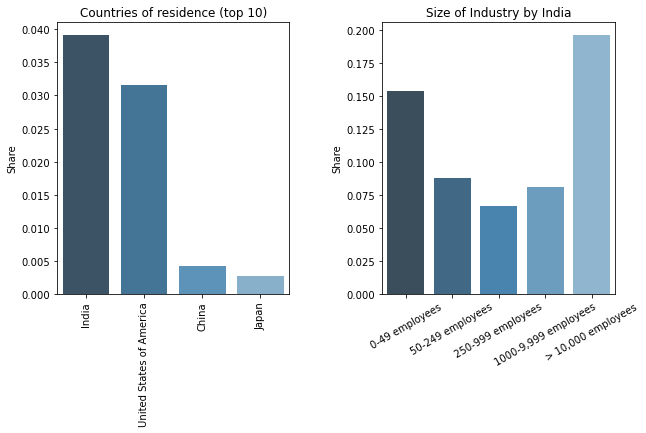

In [468]:
# Analysis of Country
# Prepare the data.
df_country_barplot = df["Q3"].value_counts()/df_shape[0]
df_country_barplot = pd.DataFrame({'Country':df_country_barplot.index,
                                 'Share':df_country_barplot.values}).head(10)

# Analysis of company size.
# Prepare the data.
df_india_size= df_india["Q6"].value_counts()/df_india_shape[0]
df_india_size = pd.DataFrame({'Size':df_india_size.index,
                                  'Share':df_india_size.values}).sort_values(['Size'])

order_company = ["0-49 employees", "50-249 employees", "250-999 employees",
                "1000-9,999 employees", "> 10,000 employees"] 

df_india_size["Size"] = pd.Categorical(df_india_size["Size"], 
                                           categories=order_company, ordered=True)

# Plot the two figures together.
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 5)

ax[0] = sns.barplot(y = "Share", x = "Country", data=df_country_barplot, palette="Blues_d", ax=ax[0]) 
ax[0].set(xlabel="", ylabel="Share")
ax[0].set_title('Countries of residence (top 10)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

ax[1] = sns.barplot(y = "Share", x = "Size", data=df_india_size, palette="Blues_d", ax=ax[1])
ax[1].set(xlabel="", ylabel="Share")
ax[1].set_title('Size of Industry by India')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)

# Adjust the space between the graphs and export the figure.
fig.subplots_adjust(wspace=0.4)
fig.savefig("country_size.png", bbox_inches='tight')

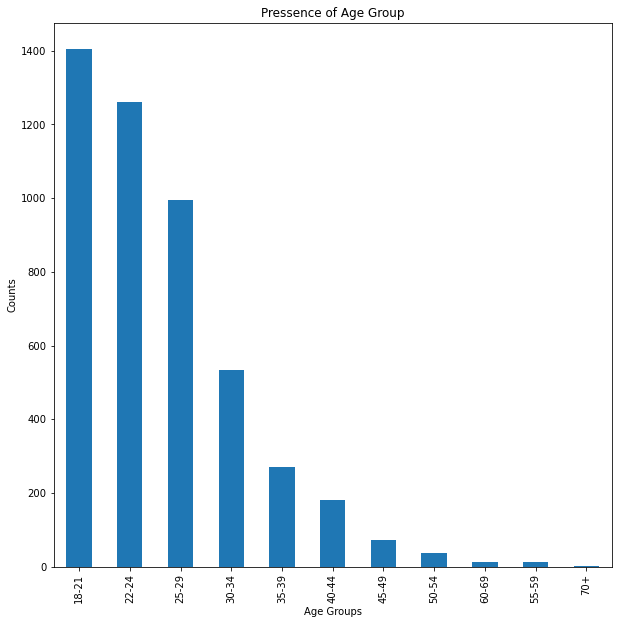

In [379]:
#Age Analysis for India
plt.figure(figsize=(10,10))
df_india.Q1.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Age Groups")
plt.title("Pressence of Age Group")
plt.show()

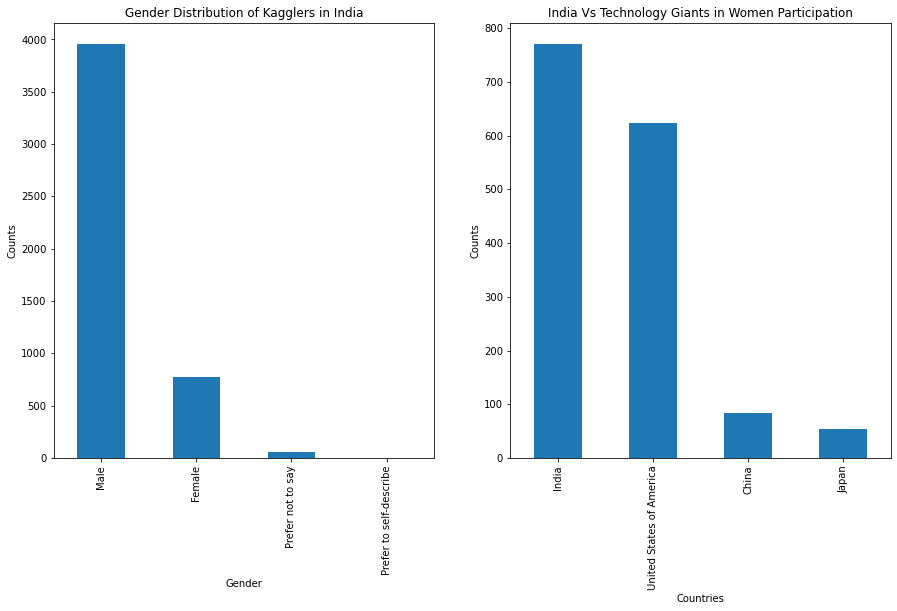

In [461]:
#Anlsys on Gender Distribution vs Tehncology giants 

#prepare the data for Gender distirubtion of india

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df_india.Q2.value_counts().plot(kind="bar")
plt.ylabel('Counts')
plt.xlabel("Gender")
plt.title("Gender Distribution of Kagglers in India")

# prepare the data for Gender distribtuion across Technology Giants
df = df.loc[(df.Q2=="Female") & ((df.Q3=="India") | (df.Q3=="United States of America") | (df.Q3=="China") | (df.Q3=="Japan")), :]
plt.subplot(1,2,2)
df.Q3.value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.xlabel("Countries")
plt.title("India Vs Technology Giants in Women Participation")

plt.show()

# How to break into this field?

In [463]:
#Prepare the data for Most Preferred online platform
df_IDE = pd.DataFrame(columns=['IDE','count','percentage'])

for i in range(1,12):
    df_IDE = df_IDE.append({'IDE':df['Q13_Part_{}'.format(i)].mode()[0],'count':df['Q13_Part_{}'.format(i)].count(),'percentage':df['Q13_Part_{}'.format(i)].count()/len(df)},ignore_index=True)
df_IDE.index = df_IDE['IDE']
df_IDE = df_IDE.drop(columns='IDE')
df_IDE['percentage'] = df_IDE['percentage']*100
df_IDE_sort = df_IDE[['percentage']].sort_values(by='percentage', ascending=False)
df_IDE_sort_rst = df_IDE_sort.reset_index()

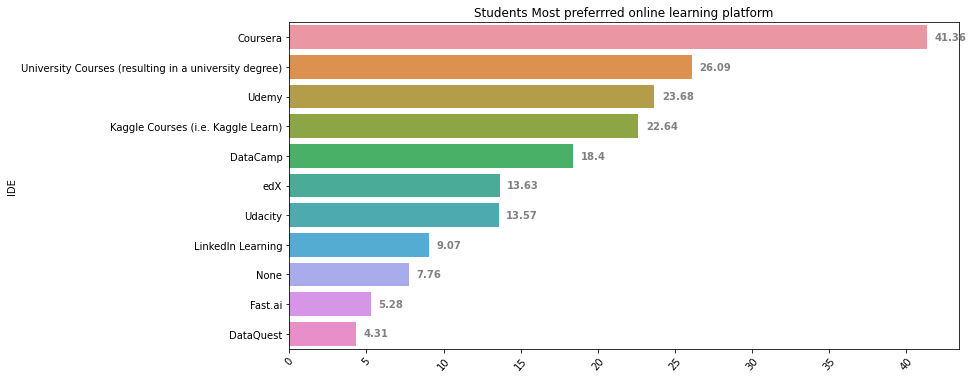

In [464]:
# Prepare the graph for preferred online platform
fig=plt.subplots(figsize=(12,6))
fig = sns.barplot(y = "IDE", x = "percentage", data=df_IDE_sort_rst)
for i in fig.patches:
    fig.text(i.get_width()+0.5, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
fig.set_xlabel('Percentage')      
fig.set_xlabel('')
fig.set_title('Students Most preferrred online learning platform')
plt.xticks(rotation=49);

fig = fig.get_figure() 

plt.show()



In [ ]:
What is the preferred language for Data Science?

In [313]:
#analhysis and prepare the data for Preferred programming language
df_prog_lang = pd.DataFrame(columns=['Language', 'count'])

for i in range(1,13):
    df_prog_lang = df_prog_lang.append({'Language':df['Q18_Part_{}'.format(i)].mode()[0], 'count':df['Q18_Part_{}'.format(i)].count()}, ignore_index=True)

df_prog_lang.index = df_prog_lang['Language']
df_prog_lang = df_prog_lang.drop(columns=['Language'])
df_prog_lang_sort = df_prog_lang.sort_values(by='count', ascending=False)
df_prog_lang_rst = df_prog_lang_sort.reset_index()

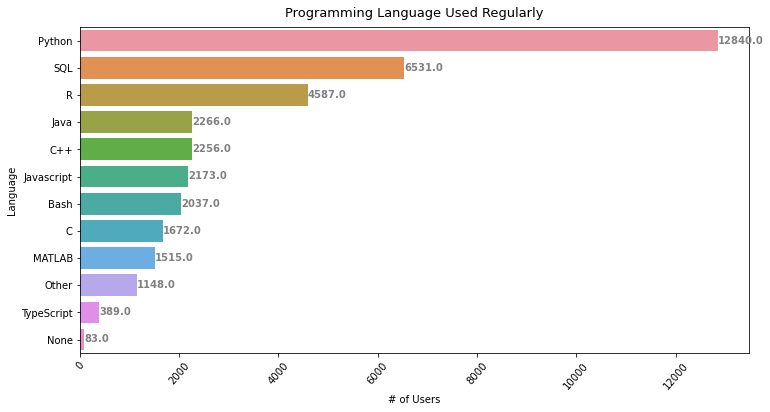

In [314]:
# Prepare the graph for preferred Programming Language
fig=plt.subplots(figsize=(12,6))
fig = sns.barplot(y = "Language", x = "count", data=df_prog_lang_rst)
for i in fig.patches:
    fig.text(i.get_width()+0.5, i.get_y()+0.5, str(round(i.get_width(),2)), 
           fontsize=10, fontweight='bold', color='grey')
fig.set_title("Programming Language Used Regularly", loc='center', pad=10, fontsize=13)
fig.set_xlabel('# of Users')

plt.xticks(rotation=49);

fig = fig.get_figure() 

plt.show()



Python clearly dominates. It is also the language mostly recommended to newbies in Data Science
